In [111]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Exercício 1 - Dataset Digits do sklearn

Acesso: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [112]:
# 1) Importar o pacote "sklearn.datasets" e o "load_digits"
from sklearn.datasets import load_digits

In [113]:
# 2) Carregar o dataset através do método: load_digits()
df_digits = load_digits()
# 3) Observe as keys do dataset usando o método "keys"
display(df_digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [114]:
# 4) A chave "data" são as features e a chave "target" é o y. Separe os dados em 2 variáveis diferentes
X, y = df_digits["data"], df_digits["target"]
display(X)
display(y)

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

array([0, 1, 2, ..., 8, 9, 8])

In [115]:
# 5) Separe o conjunto de dados em treinamento e teste usando o método: "train_test_split"
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
# 6) Treinar o K-Means, sendo o K seja igual ao número de classes do dataset
from sklearn.cluster import KMeans

myset = set(y_train)
clusters = len(myset)
display(myset)

model = KMeans(n_clusters=clusters, n_init=10, random_state=42)
model.fit(X_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

KMeans(n_clusters=10, n_init=10, random_state=42)

In [117]:
from collections import Counter

# Pegar os labels dos padrões de Treinamento
labels = model.labels_

map_labels = []

for i in range(clusters):
  map_labels.append([])

new_y_train = list(y_train)

for i in range(len(y_train)):
  for c in range(clusters):
    if labels[i] == c:
      map_labels[c].append(new_y_train[i])

# Criar dicionário com os labells a serem mapeados
mapping = {}

for i in range(clusters):
  final = Counter(map_labels[i]) # contar a classe que mais aparece
  value = final.most_common(1)[0][0] # retorna a classe com maior frequência
  mapping[i] = value

display(mapping)

{0: 4, 1: 1, 2: 3, 3: 7, 4: 1, 5: 6, 6: 9, 7: 5, 8: 2, 9: 0}

In [118]:
# 7) Mostrar a taxa de acerto do K-Means
from sklearn import metrics

result = model.predict(X_test)
result = [mapping[i] for i in result]

acc = metrics.accuracy_score(result, y_test)
show = round(acc * 100)
print("{}%".format(show))

print(list(result))
print(list(y_test))

80%
[6, 9, 3, 7, 2, 2, 5, 3, 5, 2, 1, 1, 4, 0, 4, 2, 3, 7, 9, 9, 4, 3, 9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 2, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3, 6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 9, 7, 0, 7, 9, 9, 9, 5, 7, 7, 0, 4, 5, 9, 9, 9, 0, 2, 3, 9, 0, 6, 4, 4, 9, 1, 2, 1, 3, 9, 2, 9, 4, 4, 7, 4, 3, 5, 3, 1, 1, 5, 1, 4, 2, 7, 7, 4, 4, 1, 9, 1, 7, 9, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 1, 1, 5, 7, 7, 0, 6, 6, 4, 2, 1, 0, 9, 4, 6, 9, 1, 6, 9, 0, 9, 9, 6, 6, 0, 6, 4, 9, 9, 3, 1, 7, 2, 9, 0, 4, 5, 1, 6, 5, 7, 9, 1, 4, 2, 1, 3, 7, 7, 2, 2, 3, 9, 9, 0, 3, 2, 3, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6, 4, 1, 9, 9, 5, 7, 1, 9, 4, 1, 1, 5, 4, 4, 9, 6, 1, 9, 6, 0, 4, 5, 2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 2, 4, 7, 6, 5, 1, 9, 5, 1, 0, 2, 1, 1, 7, 5, 7, 6, 2, 2, 2, 3, 4, 9, 1, 3, 6, 0, 9, 7, 7, 0, 1, 0, 4, 9, 1, 5, 3, 6, 0, 4, 2, 0, 0, 3, 6, 9, 9, 7, 3, 5, 9, 9, 9, 1, 5, 3, 3, 1, 0, 5, 1, 3, 4, 0, 2, 4, 6, 4, 3, 4, 9, 0, 5, 2, 2, 3, 1, 4, 1, 1, 7, 0, 1, 5, 2, 1, 2, 9, 7, 0, 6, 4, 1, 1, 5, 1,

2159057.2910406226
1914619.6175501032
1730182.260086908
1612286.499390834
1497595.4364257318
1404969.3162221701
1334825.6614009049
1265263.8193929233
1202278.336860986
1165230.6872280112
1131908.3396780784
1099103.8677018434
1078813.895604824
1046289.720699995
1019237.5443816143
1007585.753065212
989988.4644368881
977897.2743826497
959523.1355938826
949867.9560077593
933496.9512815909
921084.7584645732
904790.2719855744
901654.095831646
888493.0390309177
873082.2164798807
871385.324239637
855300.4285150114
845058.7576464504
840126.224781521
834088.3220536136
822814.2397684435
809064.3840358322
811801.3203442268
801097.9585294328
797676.9957126256
785761.8610594508
777327.7042629528
772811.5344347985


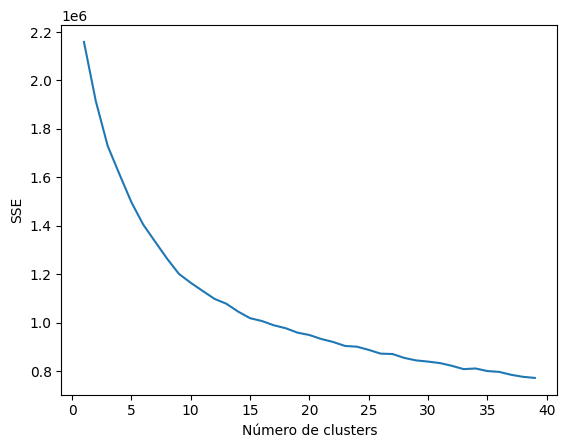

In [119]:
# 8) Calcular a curva do cotovelo para verificar qual o número ideal de clusters para esse dataset
sse = {}
for k in range(1, 40):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_
    print(sse[k])

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de clusters")
plt.ylabel("SSE")
plt.show()

In [120]:
# 9) Calcular o Coeficiente de Silhouette para o K-Means treinado em (7)
score = metrics.silhouette_score(X, km.labels_, metric='euclidean')
print('Valor do coeficiente de Silhouetter: %.3f' % score)

Valor do coeficiente de Silhouetter: 0.164


In [121]:
# 10) É possível melhorar o Coeficiente de Silhouette? Altere o K-Means para conseguir um valor melhor do Coeficiente de Silhouette.
from sklearn.model_selection import GridSearchCV

param_grid = {'n_clusters': np.arange(8, 15), 'init': ['k-means++', 'random'], 'n_init': np.arange(5, 15)}
grid = GridSearchCV(KMeans(), param_grid, cv=5)
grid.fit(X)
print(grid.best_params_)

{'init': 'random', 'n_clusters': 14, 'n_init': 13}


In [122]:
best_model = grid.best_estimator_
best_model.fit(X)
score = metrics.silhouette_score(X, best_model.labels_, metric='euclidean')
print('Valor do coeficiente de Silhouetter: %.3f' % score)

Valor do coeficiente de Silhouetter: 0.183


## Exercício 2 - Dataset Wine do sklearn
Acesso: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

In [123]:
# 1) Importar o pacote "sklearn.datasets" e o "load_wine"
from sklearn.datasets import load_wine

In [124]:
# 2) Carregar o dataset através do método: load_wine()
df_wine = load_wine()
# 3) Observe as keys do dataset usando o método "keys"
display(df_wine.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [125]:
# 4) A chave "data" são as features e a chave "target" é o y. Separe os dados em 2 variáveis diferentes
# 5) Usar todo o conjunto de dados para treinamento
X, y = df_wine["data"], df_wine["target"]
display(X)
display(y)

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [126]:
# 6) Treinar o DBScan. Quantos clusters foram gerados com os parâmetros que vc escolheu?
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn import metrics

In [127]:
model = DBSCAN(eps=50, min_samples=20)
model.fit(X)

DBSCAN(eps=50, min_samples=20)

In [128]:
core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
labels = model.labels_
display(labels)

array([-1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0, -1, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0])

In [129]:
display(np.unique(labels))

array([-1,  0])

In [130]:
n_cluters = len(set(labels)) - (1 if -1 in labels else 0)
display(n_cluters)

n_noise = list(labels).count(-1)
display(n_noise)

display("Número estimado de clusters: %d" % n_cluters)
display("Número estimado de ruídos: %d" % n_noise)

1

73

'Número estimado de clusters: 1'

'Número estimado de ruídos: 73'

In [131]:
# 7) Calcular o Coeficiente de Silhouette para o DBScan treinado em (6)
display("Índice de Silhouette: %0.3f" % metrics.silhouette_score(X, labels))

'Índice de Silhouette: 0.559'

In [136]:
# 8) É possível melhorar o Coeficiente de Silhouette? Altere os parâmetros do DBScan para conseguir um valor melhor do coeficiente
from sklearn.metrics import make_scorer

param_grid = {'eps': np.linspace(10, 70, 20), 'min_samples': np.arange(2, 30)}
def cmp(y_pred, y_true):
    return np.sum(y_pred == y_true)

class DBSCANWrapper(DBSCAN):
    # Won't work if `_X` is not the same X used in `self.fit`
    def predict(self, _X, _y=None):
        return self.labels_
    
cv = [(np.arange(X.shape[0]), np.arange(X.shape[0]))]

search = GridSearchCV(DBSCANWrapper(), param_grid, scoring=make_scorer(cmp), cv=cv)
search.fit(X, y)
print(search.best_params_)

{'eps': 51.05263157894737, 'min_samples': 5}


In [139]:
best_model = grid.best_estimator_
best_model.fit(X)
labels = best_model.labels_
display("Índice de Silhouette: %0.3f" % metrics.silhouette_score(X, labels))

'Índice de Silhouette: 0.490'